In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import accuracy_score

In [ ]:
import joblib

In [ ]:
df = pd.read_csv('/content/crimedata.csv', encoding='latin-1')

In [ ]:
df = df.filter(df.columns[[0,1,5,6,11,12,13,14,17,20,22,24,33,34,35,36,37,46,48,49,50,51,72,74,89,121,130,132,134,136,138,140,142,144,145,146]], axis=1)

In [ ]:
df=df.dropna()

In [ ]:
df.ViolentCrimesPerPop = pd.to_numeric(df.ViolentCrimesPerPop, errors='coerce')

In [ ]:
df=df.dropna()

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df

,Êcommunityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,medIncome,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,PctHousLess3BR,RentMedian,PopDens,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,75122,70.20,1.03,79584,1.96,5.81,9.90,48.18,2.70,4.47,91.43,90.17,95.78,95.81,91.46,11.06,1001,1845.9,0.00,0,8.2,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,47917,64.11,2.75,55323,3.98,5.61,13.72,29.89,2.43,5.42,86.91,85.33,96.82,86.46,89.03,23.60,560,2186.7,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,35669,55.73,2.94,42112,4.75,2.80,9.09,30.13,4.01,12.55,78.54,78.85,92.37,75.72,64.18,47.46,428,2780.9,8.30,16.6,154.95,38.74,758.14,4972.19,376.3,60.87,218.59,6167.51
3,Gloversvillecity,NY,16656,2.40,12.55,25.20,12.19,17.57,20580,38.95,11.71,26501,17.23,11.05,33.68,10.81,9.86,12.91,64.02,62.36,65.38,67.43,58.18,45.66,250,3217.7,0.00,57.86,57.86,190.93,1301.78,4142.56,271.93,?,306.64,?
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,21577,41.15,7.12,27705,17.78,8.76,23.03,20.66,5.72,13.04,71.94,69.79,79.76,75.33,57.81,53.19,280,1995.7,4.63,50.98,90.05,297.29,1386.46,5091.64,300.6,88.72,442.95,6867.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,56216,3.07,15.46,30.16,14.34,8.08,24727,31.42,19.98,27388,25.06,17.12,30.87,15.79,9.99,13.34,67.04,64.81,76.19,72.78,41.69,57.23,374,3365.4,16.49,49.46,199.5,280.29,2268.72,4225.82,806.25,56.06,545.75,7356.84
2211,Pinevillecity,LA,12251,2.68,17.36,31.23,16.97,12.57,20321,33.25,8.85,25000,20.79,12.51,27.71,19.28,7.90,13.77,68.57,63.66,80.29,73.68,56.06,54.48,248,1682.8,0.00,33.09,8.27,82.73,860.43,4748.9,198.56,16.55,124.10,5824.44
2212,Yucaipacity,CA,32824,2.46,11.81,20.96,9.53,20.73,27182,44.72,9.01,34973,7.56,7.82,26.14,12.42,5.18,11.23,76.77,74.20,76.92,82.42,74.61,61.03,451,1195.2,13.61,13.61,65.32,261.29,1709.26,2435.97,487.19,21.77,353.83,4654.2
2213,Beevillecity,TX,13547,2.89,17.16,30.01,14.73,10.42,19899,21.94,13.05,22103,30.32,24.37,39.63,12.40,12.12,12.48,67.76,63.45,87.82,74.12,60.11,50.28,227,2142.2,0.00,15.71,54.98,620.48,1508.01,3722.9,102.1,7.85,691.17,5340.87


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['state_encoded'] = label_encoder.fit_transform(df['state'])

In [ ]:
df_min_max_scaled = df.copy()
column = 'ViolentCrimesPerPop'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

In [ ]:
columns_to_scale = ["agePct12t29", "agePct65up", "pctWInvInc",'pctWPubAsst','PctPopUnderPov','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctPersOwnOccup','PctHousLess3BR','ViolentCrimesPerPop','PopDens']
scaleddata = df[columns_to_scale]

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaleddata)

In [ ]:
df[columns_to_scale] = scaled_data

In [ ]:
df

,pctWInvInc,pctWPubAsst,PctPopUnderPov,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,crimerate
0,70.20,1.03,1.96,2.70,4.47,91.43,90.17,95.78,95.81,91.46,low
1,64.11,2.75,3.98,2.43,5.42,86.91,85.33,96.82,86.46,89.03,low
2,55.73,2.94,4.75,4.01,12.55,78.54,78.85,92.37,75.72,64.18,moderate
3,38.95,11.71,17.23,9.86,12.91,64.02,62.36,65.38,67.43,58.18,moderate
5,41.15,7.12,17.78,5.72,13.04,71.94,69.79,79.76,75.33,57.81,moderate
...,...,...,...,...,...,...,...,...,...,...,...
2210,31.42,19.98,25.06,9.99,13.34,67.04,64.81,76.19,72.78,41.69,moderate
2211,33.25,8.85,20.79,7.90,13.77,68.57,63.66,80.29,73.68,56.06,low
2212,44.72,9.01,7.56,5.18,11.23,76.77,74.20,76.92,82.42,74.61,moderate
2213,21.94,13.05,30.32,12.12,12.48,67.76,63.45,87.82,74.12,60.11,high


In [ ]:
df.mean()

<ipython-input-16-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


population             52482.256046
householdsize              2.712077
agePct12t21               14.414164
agePct12t29                0.298040
agePct16t24               13.966803
agePct65up                 0.201927
medIncome              33947.199790
pctWInvInc                 0.430452
pctWPubAsst                0.236947
medFamInc              39760.022082
PctPopUnderPov             0.229034
PctLess9thGrade            9.432124
PctNotHSGrad              22.661046
PctBSorMore               23.032119
PctUnemployed              6.013281
TotalPctDiv               10.868686
PctFam2Par                 0.681066
PctKids2Par                0.675650
PctYoungKids2Par           0.750439
PctTeen2Par                0.671490
PctPersOwnOccup            0.624636
PctHousLess3BR             0.463681
RentMedian               433.257624
PopDens                 2803.496793
murdPerPop                 5.968323
rapesPerPop               36.256099
robbbPerPop              166.765973
assaultPerPop            374

In [ ]:
crimerate = df["ViolentCrimesPerPop"]

cond_list = [ crimerate < 200, crimerate < 600,crimerate >= 600]
choice_list = ["low", "moderate","high",]

df["crimerate"] = np.select(cond_list, choice_list)

In [ ]:
df = df.filter(df.columns[[9,10,12,16,17,18,19,20,21,22,36]], axis=1)

In [ ]:
rent = df["RentMedian"]

cond_list = [ rent < 500, rent >= 500]
choice_list = [0, 1]

df["rentlevel"] = np.select(cond_list, choice_list)

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df.crimerate.value_counts()

moderate    732
high        670
low         592
Name: crimerate, dtype: int64

In [ ]:
print(df_min_max_scaled.median())

In [ ]:
df

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,medIncome,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,PctHousLess3BR,RentMedian,PopDens,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,state_encoded
population,1.000000,-0.019836,-0.009231,0.044267,0.016142,-0.044070,-0.049082,-0.079302,0.101353,-0.052623,0.085644,0.034546,0.045869,-0.004740,0.079203,0.111001,-0.140369,-0.144726,-0.114505,-0.134217,-0.149632,0.131527,-0.001060,0.211811,0.220281,0.103443,0.292876,0.133301,0.108801,0.063786,0.156631,0.212076,0.119021,-0.031235
householdsize,-0.019836,1.000000,0.492449,0.385397,0.314815,-0.579885,0.177315,-0.167606,0.142205,0.088160,0.081890,0.250820,0.140294,-0.040585,0.173210,-0.394482,0.260718,0.186589,0.179087,0.250507,0.102071,-0.291767,0.148446,0.034911,0.018849,-0.132912,-0.012466,-0.011229,-0.113146,-0.237745,-0.016174,-0.019578,-0.193165,-0.057101
agePct12t21,-0.009231,0.492449,1.000000,0.868635,0.931505,-0.374918,-0.260756,-0.206492,0.153417,-0.215536,0.485962,0.135572,0.072925,0.086684,0.228418,-0.207323,-0.111235,-0.114036,-0.123749,-0.105542,-0.279821,0.039353,-0.257692,-0.065984,0.043655,0.076610,-0.016311,0.034959,0.026961,0.039847,0.016180,0.022024,0.023780,0.113890
agePct12t29,0.044267,0.385397,0.868635,1.000000,0.945319,-0.485769,-0.328815,-0.302291,0.156029,-0.282277,0.465792,0.127660,0.078348,0.047118,0.204490,-0.026486,-0.220184,-0.211709,-0.175474,-0.222955,-0.550144,0.284565,-0.192832,0.098132,0.096714,0.146810,0.097888,0.092954,0.085395,0.104222,0.064127,0.109940,0.111280,0.053600
agePct16t24,0.016142,0.314815,0.931505,0.945319,1.000000,-0.295832,-0.289033,-0.156358,0.096848,-0.213888,0.462452,0.074961,0.024986,0.143560,0.162027,-0.138874,-0.180405,-0.166766,-0.143773,-0.182357,-0.437426,0.223464,-0.187177,0.030852,0.044236,0.094790,0.037126,0.041832,0.047831,0.076746,0.019504,0.048418,0.066478,0.069285
agePct65up,-0.044070,-0.579885,-0.374918,-0.485769,-0.295832,1.000000,-0.254666,0.099127,0.102452,-0.195690,0.074736,0.131561,0.231996,-0.197559,0.100670,0.103565,-0.234870,-0.219429,-0.213249,-0.184492,0.065415,0.282992,-0.187772,-0.005760,0.015071,0.034053,0.012365,0.070286,0.121209,0.136656,-0.015530,0.053966,0.126582,-0.008206
medIncome,-0.049082,0.177315,-0.260756,-0.328815,-0.289033,-0.254666,1.000000,0.752918,-0.629242,0.979393,-0.759286,-0.546441,-0.663046,0.684827,-0.620820,-0.560410,0.715780,0.702429,0.698831,0.611145,0.618790,-0.617278,0.854633,-0.040870,-0.342291,-0.439922,-0.261169,-0.395835,-0.411557,-0.452629,-0.229557,-0.396187,-0.465541,-0.158776
pctWInvInc,-0.079302,-0.167606,-0.206492,-0.302291,-0.156358,0.099127,0.752918,1.000000,-0.748734,0.804715,-0.718424,-0.665953,-0.774406,0.735004,-0.722575,-0.616829,0.700599,0.741850,0.705645,0.605828,0.600713,-0.494016,0.603949,-0.136220,-0.486762,-0.459882,-0.425216,-0.535448,-0.513961,-0.389202,-0.301118,-0.556591,-0.485941,0.038712
pctWPubAsst,0.101353,0.142205,0.153417,0.156029,0.096848,0.102452,-0.629242,-0.748734,1.000000,-0.656640,0.780117,0.716000,0.766249,-0.558992,0.831509,0.489442,-0.726516,-0.750410,-0.764533,-0.618352,-0.532227,0.446347,-0.493363,0.194870,0.504782,0.415710,0.461859,0.519320,0.511955,0.351233,0.359940,0.557813,0.460960,-0.097962
medFamInc,-0.052623,0.088160,-0.215536,-0.282277,-0.213888,-0.195690,0.979393,0.804715,-0.656640,1.000000,-0.733253,-0.582080,-0.704108,0.768322,-0.645161,-0.560087,0.692033,0.692195,0.691319,0.587192,0.579322,-0.566051,0.841074,-0.040978,-0.359110,-0.440277,-0.271350,-0.409949,-0.411272,-0.433635,-0.239200,-0.409854,-0.455723,-0.143797


In [ ]:
corr

0       0.007059
1       0.024827
2       0.043518
5       0.089584
6       0.045169
          ...   
2210    0.110691
2211    0.024117
2212    0.071285
2213    0.140548
2214    0.187304
Name: ViolentCrimesPerPop, Length: 1902, dtype: float64

Decision Tree for partially cleaned data

In [ ]:
df

,pctWInvInc,pctWPubAsst,PctPopUnderPov,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,crimerate
0,70.20,1.03,1.96,2.70,4.47,91.43,90.17,95.78,95.81,91.46,low
1,64.11,2.75,3.98,2.43,5.42,86.91,85.33,96.82,86.46,89.03,low
2,55.73,2.94,4.75,4.01,12.55,78.54,78.85,92.37,75.72,64.18,moderate
3,38.95,11.71,17.23,9.86,12.91,64.02,62.36,65.38,67.43,58.18,moderate
5,41.15,7.12,17.78,5.72,13.04,71.94,69.79,79.76,75.33,57.81,moderate
...,...,...,...,...,...,...,...,...,...,...,...
2210,31.42,19.98,25.06,9.99,13.34,67.04,64.81,76.19,72.78,41.69,moderate
2211,33.25,8.85,20.79,7.90,13.77,68.57,63.66,80.29,73.68,56.06,low
2212,44.72,9.01,7.56,5.18,11.23,76.77,74.20,76.92,82.42,74.61,moderate
2213,21.94,13.05,30.32,12.12,12.48,67.76,63.45,87.82,74.12,60.11,high


In [ ]:
param_grid ={
    'criterion': ['gini', 'entropy'],      # Split criterion
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],      # Number of features to consider for best split
    'splitter': ['best', 'random'],        # Strategy to choose the split at each node
    'max_leaf_nodes': [None, 5, 10, 20],   # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.1, 0.2],  # Minimum impurity decrease required for splitting
    'class_weight': [None, 'balanced']    # Weight associated with classes for imbalanced data
}

In [ ]:
features = ['pctWInvInc','pctWPubAsst','PctPopUnderPov','PctUnemployed','TotalPctDiv','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctPersOwnOccup']
X = df.loc[:, features]
y = df.loc[:, ['crimerate']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
clf = DecisionTreeClassifier(class_weight= None,
  criterion ='entropy',
  max_depth= 20,
  max_features= 'auto',
  max_leaf_nodes= 20,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 10,
 splitter= 'best')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5939849624060151


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test,y_pred,average='macro')
print("Precision:",precision )
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:", recall)
f1 = f1_score(y_test, y_pred,average='macro')
print("F1:", f1)

Accuracy: 0.5939849624060151
Precision: 0.6215265601818848
Recall: 0.5923364643342514
F1: 0.599693309098318


In [ ]:

b=6

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[98,  1, 35],
       [ 6, 67, 46],
       [39, 14, 93]])

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['High','Low','Moderate'],
                     columns = ['High','Low','Moderate'])

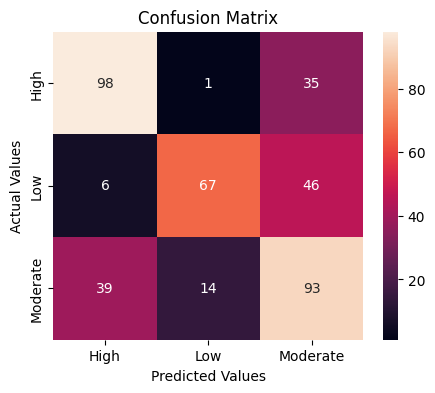

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
best_params = grid_search.best_params_

NameError: ignored

In [ ]:
best_params

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
test_score = grid_search.score(X_test, y_test)

In [ ]:
test_score

0.6220472440944882

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(max_depth= 3,max_features= None,min_samples_leaf=8,min_samples_split=2)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6640419947506562


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[132  10   3]
 [ 32  99  13]
 [ 43  24  25]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.71      0.70      0.70       145
         low       0.65      0.65      0.65       144
    moderate       0.26      0.27      0.27        92

    accuracy                           0.57       381
   macro avg       0.54      0.54      0.54       381
weighted avg       0.58      0.57      0.58       381



In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

ValueError: ignored

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

NameError: ignored

<Figure size 500x400 with 0 Axes>

In [ ]:
import pickle

In [ ]:
pip install geopy

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

In [ ]:
def get_coordinates(state_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(state_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [ ]:
df[["Latitude", "Longitude"]] = df["state"].apply(get_coordinates).apply(pd.Series)

KeyboardInterrupt: ignored

Decision Tree for cleaned data

In [ ]:
newdf = (df['agePct12t29'] >= 17.106250000000003) & (df['agePct12t29'] <= 36.45625)&(df['agePct65up'] >= 0.3474999999999966)&(df['agePct65up'] <= 23.0075)&(df['medIncome'] <= 68157.75)&(df['pctWInvInc'] >= 6.763750000000005)&(df['pctWInvInc'] <= 79.93374999999999)&(df['pctWPubAsst'] <= 17.70375)&(df['PctPopUnderPov'] <= 35.655)&(df['PctLess9thGrade'] <= 23.28875)&(df['PctNotHSGrad'] <= 52.821250000000006)&(df['PctBSorMore'] <= 51.37)&(df['PctUnemployed'] <= 12.39)&(df['TotalPctDiv'] >= 1.8612499999999983)&(df['TotalPctDiv'] <= 19.81125)&(df['PctFam2Par'] >= 46.86125)&(df['PctFam2Par'] <= 102.73125)&(df['PctKids2Par'] >= 39.31000000000001)&(df['PctKids2Par'] <= 104.38999999999999)&(df['PctYoungKids2Par'] >= 49.691250000000004)&(df['PctYoungKids2Par'] <= 116.64124999999999)&(df['PctTeen2Par'] >= 50.78499999999999)&(df['PctTeen2Par'] <= 101.82500000000002)&(df['PctPersOwnOccup'] >= 28.11125)&(df['PctPersOwnOccup'] <= 103.98125)&(df['PctHousLess3BR'] >= 12.857499999999995)&(df['PctHousLess3BR'] <= 79.0375)&(df['PctHousLess3BR'] <= 945.0)&(df['PctHousLess3BR'] <= 1735.3587499999999)

In [ ]:
filtered_df = df[newdf]

In [ ]:
filtered_df

,Êcommunityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,medIncome,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,PctHousLess3BR,RentMedian,PopDens,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,state_encoded
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,47917,64.11,2.75,55323,3.98,5.61,13.72,29.89,2.43,5.42,86.91,85.33,96.82,86.46,89.03,23.60,560,2186.7,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95,32
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,35669,55.73,2.94,42112,4.75,2.80,9.09,30.13,4.01,12.55,78.54,78.85,92.37,75.72,64.18,47.46,428,2780.9,8.30,16.60,154.95,38.74,758.14,4972.19,376.3,60.87,218.59,6167.51,31
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,21577,41.15,7.12,27705,17.78,8.76,23.03,20.66,5.72,13.04,71.94,69.79,79.76,75.33,57.81,53.19,280,1995.7,4.63,50.98,90.05,297.29,1386.46,5091.64,300.6,88.72,442.95,6867.42,20
6,Norwoodtown,MA,28700,2.60,11.17,27.41,12.76,14.42,42805,47.70,5.41,50394,4.01,4.49,13.89,27.01,4.85,7.64,79.53,79.76,92.05,77.12,64.62,47.35,669,2643.5,0.00,13.53,30.44,182.66,372.09,974.19,487.1,57.50,226.63,1890.88,16
7,Andersoncity,IN,59459,2.45,15.31,27.93,14.78,14.60,23221,35.74,8.81,28901,17.98,10.09,28.67,12.00,8.19,14.94,62.56,58.70,69.89,62.76,65.29,56.30,253,1515.3,13.13,55.79,160.80,210.02,997.60,3691.79,205.1,14.77,439.73,4909.26,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,WestHaventown,CT,54021,2.54,11.86,27.72,13.18,13.39,35723,40.72,4.89,41907,6.06,8.49,25.52,17.18,5.45,10.93,71.24,68.64,81.27,75.22,61.78,57.29,534,4812.3,0.00,9.46,124.89,151.38,985.85,3256.51,883.67,18.92,285.73,5144.94,6
2208,Willistoncity,ND,13131,2.56,13.81,24.03,10.78,12.99,22407,46.16,7.36,29144,14.46,12.58,23.60,17.45,5.88,9.20,77.17,77.16,82.32,81.83,68.26,48.31,218,1824.8,0.00,7.81,15.62,23.42,242.04,3372.89,203,0.00,46.85,3817.93,23
2209,Manvilleborough,NJ,10567,2.57,10.42,24.90,11.10,15.33,37664,48.61,5.43,44587,4.33,12.84,27.73,9.28,4.13,8.98,76.36,73.53,91.16,73.45,75.36,41.32,553,4109.8,0.00,0.00,28.47,104.39,170.83,1717.76,104.39,0.00,132.87,1992.98,25
2211,Pinevillecity,LA,12251,2.68,17.36,31.23,16.97,12.57,20321,33.25,8.85,25000,20.79,12.51,27.71,19.28,7.90,13.77,68.57,63.66,80.29,73.68,56.06,54.48,248,1682.8,0.00,33.09,8.27,82.73,860.43,4748.90,198.56,16.55,124.10,5824.44,15


In [ ]:
columns_to_scale = ['agePct12t29','agePct65up','medIncome','PctLess9thGrade','pctWInvInc','pctWPubAsst','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','TotalPctDiv','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctPersOwnOccup','PctHousLess3BR','RentMedian','ViolentCrimesPerPop']
scaleddata = filtered_df[columns_to_scale]

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaleddata)

In [ ]:
filtered_df[columns_to_scale] = scaled_data

<ipython-input-18-be2d74ca6022>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[columns_to_scale] = scaled_data


In [ ]:
crimerate = filtered_df["ViolentCrimesPerPop"]

cond_list = [ crimerate < 0.05, crimerate < 0.1,crimerate >= 0.1]
choice_list = ["low", "moderate","high",]

filtered_df["crimerate"] = np.select(cond_list, choice_list)

<ipython-input-19-89bd25f5b585>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["crimerate"] = np.select(cond_list, choice_list)


In [ ]:
features = ['agePct12t29','agePct65up','medIncome','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','TotalPctDiv','PctKids2Par','PopDens']
X = filtered_df.loc[:, features]
y = filtered_df.loc[:, ['crimerate']]

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
clf = DecisionTreeClassifier(class_weight= None,
  criterion ='entropy',
  max_depth= 20,
  max_features= 'auto',
  max_leaf_nodes= 20,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 10,
 splitter= 'best')



clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5880398671096345


In [ ]:
param_grid ={
    'criterion': ['gini', 'entropy'],      # Split criterion
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],      # Number of features to consider for best split
    'splitter': ['best', 'random'],        # Strategy to choose the split at each node
    'max_leaf_nodes': [None, 5, 10, 20],   # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.1, 0.2],  # Minimum impurity decrease required for splitting
    'class_weight': [None, 'balanced']    # Weight associated with classes for imbalanced data
}

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy');
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=20,
                                              min_samples_split=10),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_params

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
joblib.dump(clf, 'content/decision_tree_model.joblib')

FileNotFoundError: ignored